# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font></div>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset # Load dataset monthly avg of co2
df = pd.read_csv('../Data/co2_mm_mlo.csv')

In [16]:
df.head(2)

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45


In [17]:
df['date'] = pd.to_datetime ( dict(year=df['year'], month=df['month'], day=1) )

In [18]:
df.set_index('date',inplace=True)

In [19]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          729 non-null    int64  
 1   month         729 non-null    int64  
 2   decimal_date  729 non-null    float64
 3   average       722 non-null    float64
 4   interpolated  729 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [21]:
df.index.freq = 'MS'

In [22]:
df

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86
...,...,...,...,...,...
2018-07-01,2018,7,2018.542,408.71,408.71
2018-08-01,2018,8,2018.625,406.99,406.99
2018-09-01,2018,9,2018.708,405.51,405.51


<AxesSubplot:xlabel='date'>

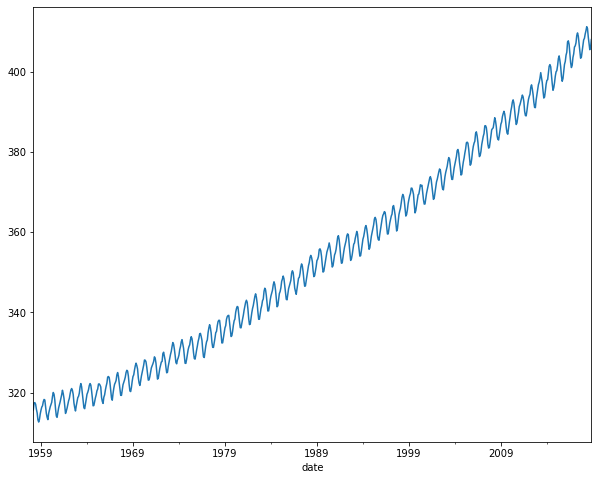

In [23]:
plt.figure(figsize=(10,8))
df['interpolated'].plot()

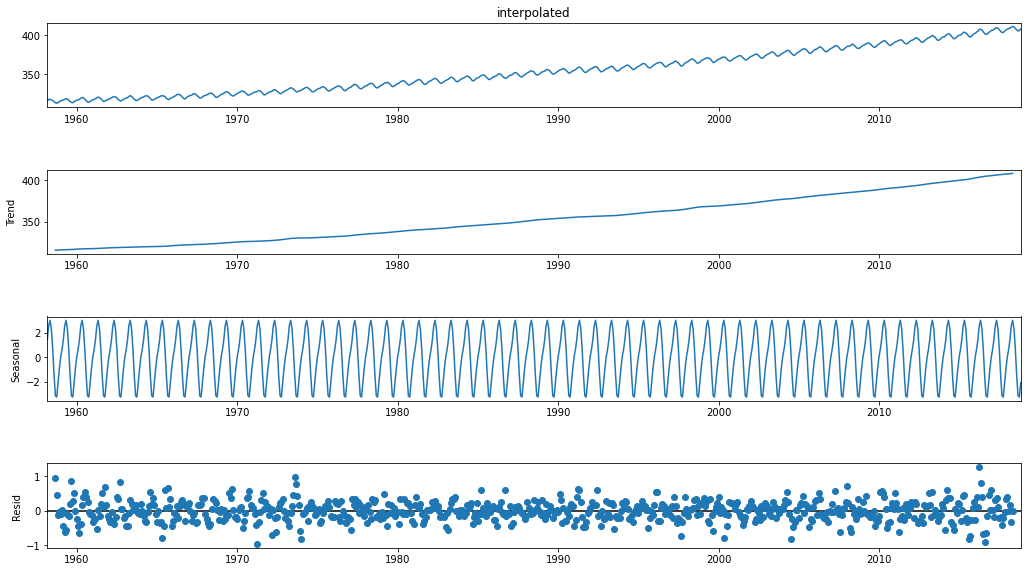

In [33]:
decompose = seasonal_decompose(df['interpolated'], model='additive')
fig = decompose.plot()
fig.set_size_inches((16, 9))

fig.show();

In [35]:
model_auto_arima = auto_arima(df['interpolated'],seasonal=True, m =12)

AttributeError: 'ARIMA' object has no attribute 'show'

In [36]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  729
Model:             SARIMAX(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -205.178
Date:                              Sat, 18 Jun 2022   AIC                            424.356
Time:                                      21:07:07   BIC                            456.489
Sample:                                           0   HQIC                           436.755
                                              - 729                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3516      0.036     -9.738      0.000      -0.422      -0.281
ar.L2         -0.1469      0.035     -4.146      0.000      -0.216      -0.077
ar.L3         -0.1323      0.038     -3.471      0.001      -0.207      -0.058
ar.L4         -0.1051      0.037     -2.833      0.005      -0.178      -0.032
ar.S.L12       0.9996      0.000   3161.311      0.000       0.999       1.000
ma.S.L12      -0.8656      0.022    -40.025      0.000      -0.908      -0.823
sigma2         0.0955      0.005     20.223      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.74   Prob(JB):                         0.16
Heteroskedasticity (H):               1.13   Skew:                             0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
len(df)

729

In [39]:
train = df.iloc[:717]

In [40]:
test = df.iloc[717:]

In [41]:
model = SARIMAX(df['interpolated'], order=(4, 1, 0), seasonal_order=(1, 0, [1], 12))

In [50]:
result = model.fit()

In [51]:
start = len(train)

In [52]:
end = len( train + test ) -1

In [53]:
end

728

In [54]:
start

717

In [58]:
predictions = result.predict(start= start, end = end,typ='levels').rename('SARIMA Predictions')

In [59]:
predictions

date
2017-12-01    406.599412
2018-01-01    407.965848
2018-02-01    408.693018
2018-03-01    409.338792
2018-04-01    410.938441
2018-05-01    411.128466
2018-06-01    410.443022
2018-07-01    409.001726
2018-08-01    406.721924
2018-09-01    405.377759
2018-10-01    405.752211
2018-11-01    407.452071
Freq: MS, Name: SARIMA Predictions, dtype: float64

<AxesSubplot:xlabel='date'>

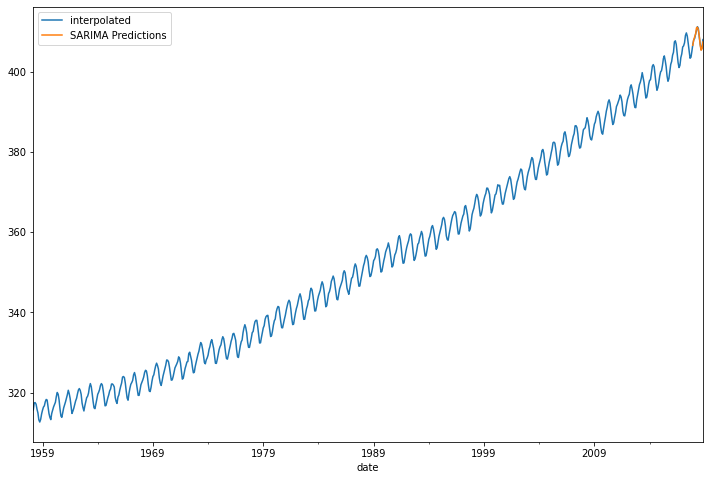

In [62]:
df['interpolated'].plot(legend =True, figsize=(12,8))
predictions.plot(legend=True)

<AxesSubplot:xlabel='date'>

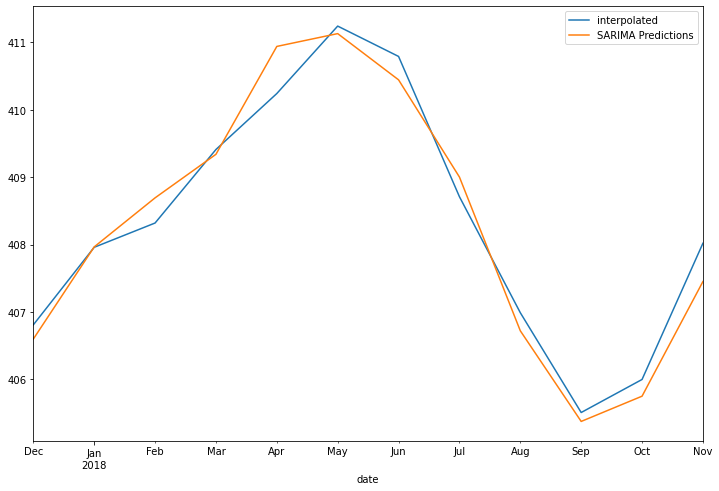

In [65]:
test['interpolated'].plot(legend =True, figsize=(12,8))
predictions.plot(legend=True)

In [66]:
from statsmodels.tools.eval_measures import rmse

In [68]:
rms = rmse(predictions,test['interpolated'])

In [69]:
rms ** 2

0.11397056437029106